<a href="https://colab.research.google.com/github/OluwatodimuAdegoke/ComputerVisionCourse/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # Models
import pandas as pd  # Reading and processing data
import seaborn as sns # Visualization
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import RootMeanSquaredError

Data Preparation

In [2]:
# Read the data
data = pd.read_csv("train.csv",sep=',')
data.shape
# Plots the graphs of each variable against the other
# sns.pairplot(data[['years','km','rating','condition','economy','top speed','hp', 'torque','current price']])

(1000, 12)

In [3]:
tensor_data = tf.constant(data)
# Cast to float32
tensor_data = tf.cast(tensor_data,tf.float32)
# Shuffle the data to avoid bias
tensor_data = tf.random.shuffle(tensor_data)


In [4]:
x = tensor_data[:,3:-1]
print(x.shape)
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis = -1)
print(y.shape)

(1000, 8)
(1000, 1)


In [15]:
#Divide the dataset into training, validation and testing data
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(x)


In [16]:
x_train = x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)

(800, 8)


In [17]:
x_val = x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)

x_test = x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)

(100, 8)
(100, 8)


In [18]:
# Normalize the input
normalizer = Normalization()
# Gets the mean and std itself
normalizer.adapt(x_train)
normalizer(x_train)

<tf.Tensor: shape=(800, 8), dtype=float32, numpy=
array([[-0.3451495 , -1.1255285 , -1.4195638 , ..., -0.10946778,
         1.6782013 ,  0.81605536],
       [-0.9326389 , -0.52780145,  1.4231169 , ..., -1.0466572 ,
         0.4715137 ,  0.48526224],
       [-1.5201283 ,  0.47419474,  1.4231169 , ...,  0.46325907,
         0.5680487 , -1.6412652 ],
       ...,
       [-1.5201283 , -1.4029137 ,  0.00177655, ..., -0.78632677,
        -1.024779  , -1.3577281 ],
       [ 0.24233986, -0.22200675, -1.4195638 , ...,  1.4004484 ,
        -0.15596385, -0.41260487],
       [ 0.24233986, -1.2817801 , -1.4195638 , ...,  0.3591269 ,
        -0.49383637,  1.00508   ]], dtype=float32)>

In [19]:
# Create a model with keras
model = tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(1)])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


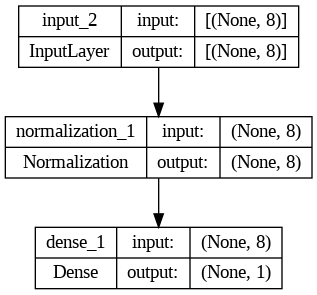

In [20]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

In [21]:
# Uses the mean square error. Can also use the mean absolute error
# Use mean absolute error when there is a outlier that'll affect the data
# Can also use Huber loss
model.compile(optimizer=Adam(learning_rate = 1),
              loss=MeanAbsoluteError(),
              metrics = RootMeanSquaredError())

In [22]:
# Training the model
#
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 306550.0000 - root_mean_squared_error: 331573.1875 - val_loss: 318911.1875 - val_root_mean_squared_error: 343270.6562
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 306524.7500 - root_mean_squared_error: 331550.0938 - val_loss: 318887.4062 - val_root_mean_squared_error: 343248.7812
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 306499.6250 - root_mean_squared_error: 331526.5625 - val_loss: 318861.3125 - val_root_mean_squared_error: 343224.2500
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 306474.7500 - root_mean_squared_error: 331503.4062 - val_loss: 318836.1875 - val_root_mean_squared_error: 343201.3125
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 306449.5938 - root_mean_squared_error: 331480.1875 - val_loss: 318811.9062 - val_root_mean_squared_error: 343178.9375
Epoch 6/100
25/25 [=========================

<function matplotlib.pyplot.show(close=None, block=None)>

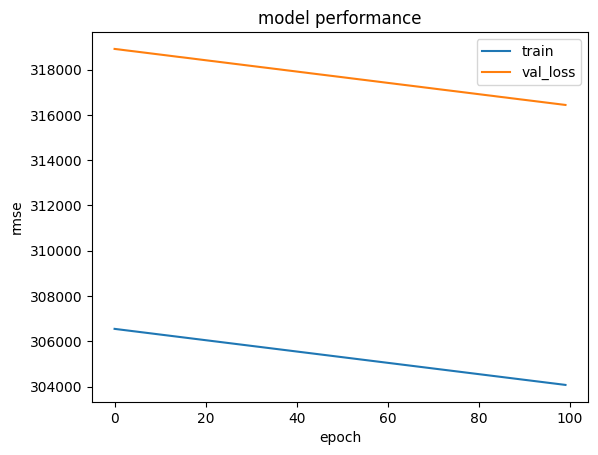

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show

In [28]:
# Evaluate the model
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 311273.0625 - root_mean_squared_error: 334110.2500


[311273.0625, 334110.25]

In [60]:
y_pred = list(model.predict(x_test)[:,0])
print(y_pred)


4/4 [==============================] - 0s 3ms/step
[2509.3135, 2485.0579, 2493.682, 2517.051, 2498.1953, 2492.442, 2506.2424, 2489.0183, 2504.4604, 2496.829, 2500.7712, 2490.9438, 2497.0227, 2488.9827, 2507.982, 2504.357, 2510.9688, 2488.4707, 2482.833, 2491.57, 2498.2058, 2497.4238, 2500.1155, 2516.6226, 2509.4114, 2509.2427, 2498.7834, 2487.1675, 2492.0222, 2496.495, 2506.5222, 2503.0056, 2504.8342, 2509.6362, 2500.2114, 2501.7278, 2504.3801, 2497.2512, 2497.357, 2487.3481, 2507.6624, 2496.8677, 2478.5183, 2494.4597, 2498.4983, 2494.1187, 2498.449, 2483.5671, 2492.1267, 2501.7124, 2492.332, 2505.7612, 2525.4036, 2518.0312, 2496.0173, 2490.3599, 2502.4226, 2500.3057, 2501.6707, 2506.3074, 2506.329, 2505.4265, 2515.3975, 2493.6824, 2498.6274, 2512.5833, 2510.622, 2506.0557, 2508.1482, 2490.1758, 2492.9014, 2497.7551, 2500.4849, 2505.239, 2513.8708, 2486.8435, 2504.1033, 2503.981, 2506.263, 2516.3843, 2506.6824, 2483.9465, 2513.9456, 2516.8435, 2496.504, 2493.442, 2510.5427, 2506.4702, 

In [57]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([298023.], dtype=float32)>